In [3]:
def newX(x, b):
    newX = b * x * (1-x)
    return newX

In [26]:
b = 3.5
N = 100
x = [0.75]

for i in range(0,N):
    x.append(newX(x[-1],b))



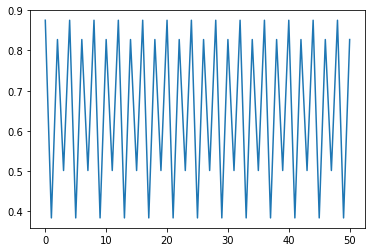

In [29]:
import matplotlib.pyplot as plt
plt.plot(x[N//2:])
plt.show()